# CAP 6619 - Deep Learning
## Summer 2021 - Dr Marques
## Assignment 2

Deep learning solutions for: 
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb 
- https://developers.google.com/machine-learning/guides/text-classification/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

#### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

In [197]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [206]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [238]:
#train_data[0]

In [208]:
train_labels[0]

1

In [209]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [210]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [237]:
#print(reverse_word_index)

In [212]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [213]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [236]:
#print(train_data)

In [235]:
#print(test_data)

In [216]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [217]:
y_train = np.asarray(train_labels).astype("float32")
print(y_train)
y_test = np.asarray(test_labels).astype("float32")
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


### (OPTIONAL) TODO 2

Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [218]:
#importing the training data
import pandas as pd
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [219]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [220]:
imdb_data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

### Building your model

#### Model definition

In [221]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [222]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [223]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [224]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5081 - accuracy: 0.7819 - val_loss: 0.3902 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3016 - accuracy: 0.9016 - val_loss: 0.3015 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2183 - accuracy: 0.9301 - val_loss: 0.2791 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1761 - accuracy: 0.9427 - val_loss: 0.2775 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1424 - accuracy: 0.9553 - val_loss: 0.2903 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1149 - accuracy: 0.9647 - val_loss: 0.2987 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0957 - accuracy: 0.9723 - val_loss: 0.3118 - val_accuracy: 0.8823
Epoch 8/20
30

In [225]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

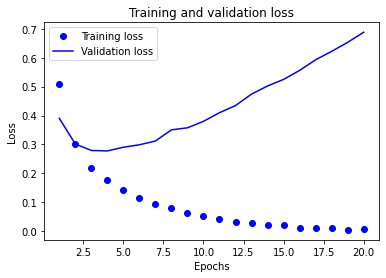

In [226]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

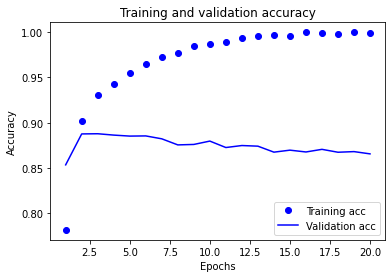

In [227]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 3

Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

Comment on the mistakes and what you believe might have caused each of them. 

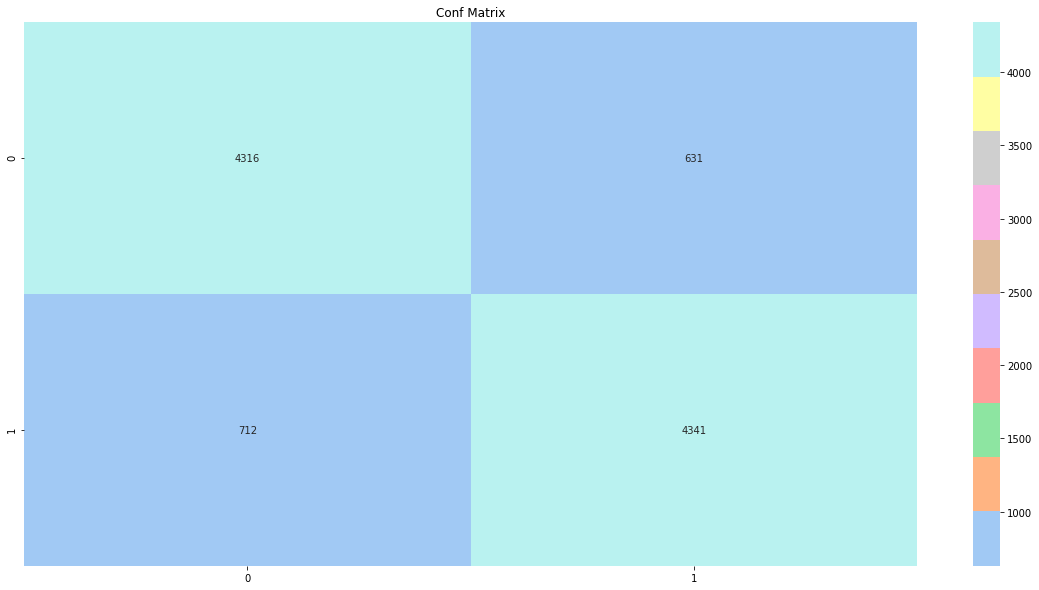

(4341, 631, 4316, 712)

In [228]:
import tensorflow as tf
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")
def conMatrix():
    plt.figure(figsize=(20,10))
    sns.heatmap(confusion_matrix(y_val, model.predict_classes(x_val)) , 
                cmap=sns.color_palette("pastel", as_cmap=True),
               annot=True, fmt="d")
    plt.title("Conf Matrix")
    plt.show()
conMatrix()

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
perf_measure(y_val, model.predict_classes(x_val))

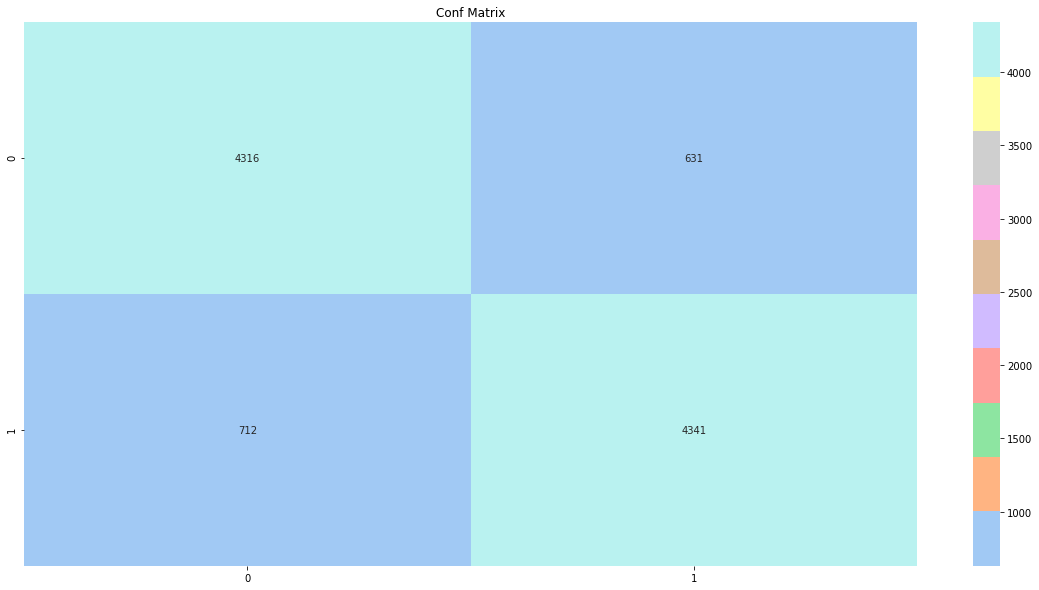

4341 631 4316 712


In [234]:
class Todo3_A:
    def __init__(self, x, y, model):
        self.y_val = x
        self.x_val = y
        self.model = model
        self.build()

    def build(self):
        self.build_matrix()
        values = self.metricsCals(self.y_val, self.model.predict_classes(self.x_val))

    def build_matrix(self):
        plt.figure(figsize=(20, 10))
        sns.heatmap(confusion_matrix(self.y_val, self.model.predict_classes(self.x_val)),
                    cmap=sns.color_palette("pastel", as_cmap=True),
                    annot=True, fmt="d")
        plt.title("Conf Matrix")
        plt.show()

    def metricsCals(self, y_actual, y_pred):
        TruePos = 0
        FalsePos = 0
        TrueNegative = 0
        FalseNeg = 0

        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == 1:
                TruePos += 1
            if y_pred[i] == 1 and y_actual[i] != y_pred[i]:
                FalsePos += 1
            if y_actual[i] == y_pred[i] == 0:
                TrueNegative += 1
            if y_pred[i] == 0 and y_actual[i] != y_pred[i]:
                FalseNeg += 1
        print(TruePos, FalsePos, TrueNegative, FalseNeg)
        return (TruePos, FalsePos, TrueNegative, FalseNeg)


Todo3_A(y_val, x_val,model)

### (OPTIONAL) TODO 4

Write code to try different combinations of:
- numbers of hidden layers and units per layer 
- loss functions
- activation functions

Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

build model
compile model
train data
train model
Epoch 1/20
47/47 [==============================] - 1s 11ms/step - loss: 0.4422 - accuracy: 0.8262 - val_loss: 0.3077 - val_accuracy: 0.8890
Epoch 2/20
47/47 [==============================] - 0s 8ms/step - loss: 0.2541 - accuracy: 0.9112 - val_loss: 0.2951 - val_accuracy: 0.8750
Epoch 3/20
47/47 [==============================] - 0s 8ms/step - loss: 0.1977 - accuracy: 0.9310 - val_loss: 0.2738 - val_accuracy: 0.8870
Epoch 4/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1636 - accuracy: 0.9435 - val_loss: 0.2831 - val_accuracy: 0.8900
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 0.2712 - val_accuracy: 0.8900
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1223 - accuracy: 0.9583 - val_loss: 0.3205 - val_accuracy: 0.8740
Epoch 7/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1103 - accuracy: 0.9621 - val_loss: 

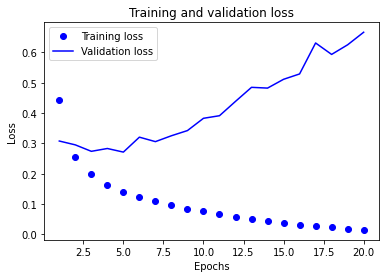

Plotting the training and validation loss


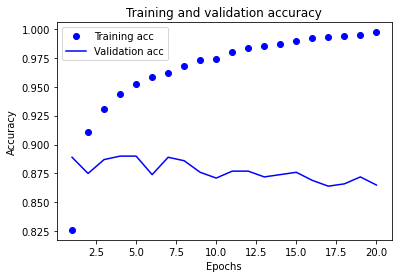

In [169]:
class Todo4_A:

    # init method or constructor
    def __init__(self, x, y):
        self.x_train = x
        self.y_train = y
        self.build()

    def build(self):
        self.build_model()
        self.compile_model()
        self.train_data()
        self.train_Model()
        self.plot_A()
        self.plot_B()

    def build_model(self):
        print("build model")
        self.model = keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(1, activation="sigmoid")
        ])

    def compile_model(self):
        print("compile model")
        self.model.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

    def train_data(self):
        print("train data")
        self.x_val_optional = self.x_train[:1000]
        self.partial_x_train_optional = self.x_train[1000:]
        self.y_val_optional = self.y_train[:1000]
        self.partial_y_train_optional = self.y_train[1000:]

    def train_Model(self):
        print("train model")
        self.history_optional = self.model.fit(self.partial_x_train_optional,
                                               self.partial_y_train_optional,
                                               epochs=20,
                                               batch_size=512,
                                               validation_data=(self.x_val_optional, self.y_val_optional))
        self.history_dict = self.history_optional.history
        print(self.history_dict.keys())
    def plot_A(self):
        print("Plotting the training and validation loss")
        self.history_dict = self.history_optional.history
        self.loss_values = self.history_dict["loss"]
        self.val_loss_values = self.history_dict["val_loss"]
        self.epochs = range(1, len(self.loss_values) + 1)
        plt.plot(self.epochs, self.loss_values, "bo", label="Training loss")
        plt.plot(self.epochs, self.val_loss_values, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    def plot_B(self):
        print("Plotting the training and validation loss")
        plt.clf()
        self.acc = self.history_dict["accuracy"]
        self.val_acc = self.history_dict["val_accuracy"]
        plt.plot(self.epochs, self.acc, "bo", label="Training acc")
        plt.plot(self.epochs, self.val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


Todo4_A(x_train, y_train)

build model
compile model
train data
train model
Epoch 1/20
47/47 [==============================] - 1s 12ms/step - loss: 0.5192 - accuracy: 0.7805 - val_loss: 0.3459 - val_accuracy: 0.8790
Epoch 2/20
47/47 [==============================] - 0s 8ms/step - loss: 0.2766 - accuracy: 0.9048 - val_loss: 0.2833 - val_accuracy: 0.8870
Epoch 3/20
47/47 [==============================] - 0s 8ms/step - loss: 0.2015 - accuracy: 0.9293 - val_loss: 0.2630 - val_accuracy: 0.8870
Epoch 4/20
47/47 [==============================] - 0s 8ms/step - loss: 0.1674 - accuracy: 0.9397 - val_loss: 0.2761 - val_accuracy: 0.8850
Epoch 5/20
47/47 [==============================] - 0s 8ms/step - loss: 0.1417 - accuracy: 0.9505 - val_loss: 0.3007 - val_accuracy: 0.8810
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 0.1194 - accuracy: 0.9602 - val_loss: 0.3213 - val_accuracy: 0.8830
Epoch 7/20
47/47 [==============================] - 0s 8ms/step - loss: 0.1074 - accuracy: 0.9633 - val_loss: 

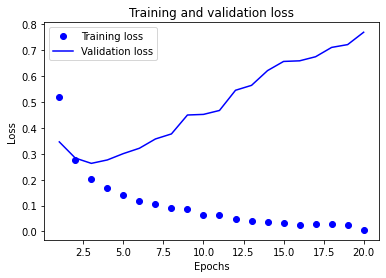

Plotting the training and validation loss


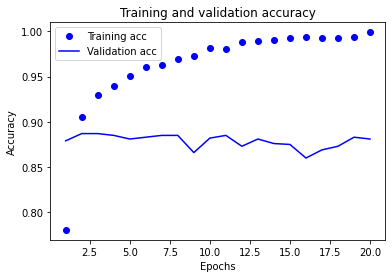

In [170]:
class Todo4_B:

    # init method or constructor
    def __init__(self, x, y):
        self.x_train = x
        self.y_train = y
        self.build()

    def build(self):
        self.build_model()
        self.compile_model()
        self.train_data()
        self.train_Model()
        self.plot_A()
        self.plot_B()

    def build_model(self):
        print("build model")
        self.model = keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(1, activation="sigmoid")
        ])

    def compile_model(self):
        print("compile model")
        self.model.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

    def train_data(self):
        print("train data")
        self.x_val_optional = self.x_train[:1000]
        self.partial_x_train_optional = self.x_train[1000:]
        self.y_val_optional = self.y_train[:1000]
        self.partial_y_train_optional = self.y_train[1000:]

    def train_Model(self):
        print("train model")
        self.history_optional = self.model.fit(self.partial_x_train_optional,
                                               self.partial_y_train_optional,
                                               epochs=20,
                                               batch_size=512,
                                               validation_data=(self.x_val_optional, self.y_val_optional))
        self.history_dict = self.history_optional.history
        print(self.history_dict.keys())
    def plot_A(self):
        print("Plotting the training and validation loss")
        self.history_dict = self.history_optional.history
        self.loss_values = self.history_dict["loss"]
        self.val_loss_values = self.history_dict["val_loss"]
        self.epochs = range(1, len(self.loss_values) + 1)
        plt.plot(self.epochs, self.loss_values, "bo", label="Training loss")
        plt.plot(self.epochs, self.val_loss_values, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    def plot_B(self):
        print("Plotting the training and validation loss")
        plt.clf()
        self.acc = self.history_dict["accuracy"]
        self.val_acc = self.history_dict["val_accuracy"]
        plt.plot(self.epochs, self.acc, "bo", label="Training acc")
        plt.plot(self.epochs, self.val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


Todo4_B(x_train, y_train)

build model
compile model
train data
train model
Epoch 1/20
47/47 [==============================] - 1s 11ms/step - loss: 0.6168 - accuracy: 0.7514 - val_loss: 0.3668 - val_accuracy: 0.8620
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.3212 - accuracy: 0.8940 - val_loss: 0.3683 - val_accuracy: 0.8850
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.2671 - accuracy: 0.9104 - val_loss: 0.4528 - val_accuracy: 0.8760
Epoch 4/20
47/47 [==============================] - 0s 9ms/step - loss: 0.2272 - accuracy: 0.9306 - val_loss: 0.4770 - val_accuracy: 0.8810
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1963 - accuracy: 0.9465 - val_loss: 0.5359 - val_accuracy: 0.8860
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1812 - accuracy: 0.9536 - val_loss: 0.4594 - val_accuracy: 0.8910
Epoch 7/20
47/47 [==============================] - 0s 9ms/step - loss: 0.1678 - accuracy: 0.9620 - val_loss: 

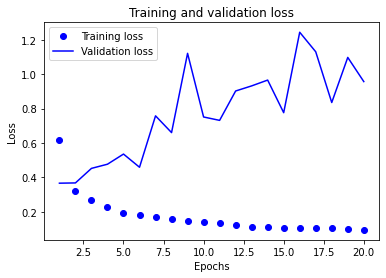

Plotting the training and validation loss


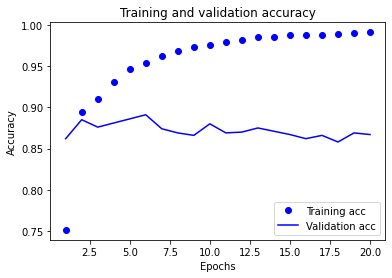

In [171]:
class Todo4_B:

    # init method or constructor
    def __init__(self, x, y):
        self.x_train = x
        self.y_train = y
        self.build()

    def build(self):
        self.build_model()
        self.compile_model()
        self.train_data()
        self.train_Model()
        self.plot_A()
        self.plot_B()

    def build_model(self):
        print("build model")
        self.model = keras.Sequential([
            layers.Dense(16, activation="tanh"),
            layers.Dense(16, activation="tanh"),
            layers.Dense(16, activation="tanh"),
            layers.Dense(16, activation="tanh"),
            layers.Dense(1, activation="tanh")
        ])

    def compile_model(self):
        print("compile model")
        self.model.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

    def train_data(self):
        print("train data")
        self.x_val_optional = self.x_train[:1000]
        self.partial_x_train_optional = self.x_train[1000:]
        self.y_val_optional = self.y_train[:1000]
        self.partial_y_train_optional = self.y_train[1000:]

    def train_Model(self):
        print("train model")
        self.history_optional = self.model.fit(self.partial_x_train_optional,
                                               self.partial_y_train_optional,
                                               epochs=20,
                                               batch_size=512,
                                               validation_data=(self.x_val_optional, self.y_val_optional))
        self.history_dict = self.history_optional.history
        print(self.history_dict.keys())
    def plot_A(self):
        print("Plotting the training and validation loss")
        self.history_dict = self.history_optional.history
        self.loss_values = self.history_dict["loss"]
        self.val_loss_values = self.history_dict["val_loss"]
        self.epochs = range(1, len(self.loss_values) + 1)
        plt.plot(self.epochs, self.loss_values, "bo", label="Training loss")
        plt.plot(self.epochs, self.val_loss_values, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    def plot_B(self):
        print("Plotting the training and validation loss")
        plt.clf()
        self.acc = self.history_dict["accuracy"]
        self.val_acc = self.history_dict["val_accuracy"]
        plt.plot(self.epochs, self.acc, "bo", label="Training acc")
        plt.plot(self.epochs, self.val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


Todo4_B(x_train, y_train)

### Retraining a model from scratch

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4960 - accuracy: 0.7962
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2817 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2083 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 1s 779us/step - loss: 0.2891 - accuracy: 0.8847


### Using a trained model to generate predictions on new data

In [20]:
model.predict(x_test)

array([[0.16392902],
       [0.9981135 ],
       [0.77815944],
       ...,
       [0.11672992],
       [0.06937361],
       [0.4931144 ]], dtype=float32)

(1) What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

(2) Does your model suffer from overfitting? If so, what would you suggest
doing about it?

(3) Is accuracy a good metric of success in this case? Why (not)?

1- We are not able to send lists of integers into a neural network. We have to convert  lists into
tensors.Two ways below:

A. We could pad our lists so that they all have the same length and turn them into an integer
tensor shape , then use as first layer in our network a (samples, word_indices)
layer capable of handling such integer tensors(above)

B. We could one-hot-encode our lists to turn them into vectors of 0s and 1s. This
would mean for instance turning the sequence into a 10,000-dimensional vector [3, 5]
that would be all-zeros except for indices 3 and 5, which would be ones. Then we could
use as first layer in our network a layer, capable of handling floating point vector Dense
data.

2- This is an example of what we were warning against earlier: a model that performs better on the training data isn’t  a model that will do better on data it has never seen before.What we are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data,

3 -The dots are the training loss and accuracy, while the solid lines are the validation
loss and accuracy. you can see my results are slightly different due to a different random
initialization of network. you can see the training loss decreases with every epoch and the training accuracy
increases with every epoch. That is considered a expectation when running gradient
descent optimization. The quantity you are trying to minimize should get lower with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. It is a good metric because it helped me determine overfitting also helps me determine correct number of predictions which is a what we need in this use case.

## PART 2 - Multiclass classification of newswires using the Reuters dataset

Once again, we will start with a simple solution using a fully-connected neural network architecture. 

### The Reuters dataset

#### Loading the Reuters dataset

In [117]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [118]:
len(train_data)

8982

In [119]:
len(test_data)

2246

In [120]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [121]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [122]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [123]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [124]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [125]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [126]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [127]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [128]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [129]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.7251 - accuracy: 0.5178 - val_loss: 1.8038 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4400 - accuracy: 0.7056 - val_loss: 1.3203 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0580 - accuracy: 0.7671 - val_loss: 1.1408 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8269 - accuracy: 0.8198 - val_loss: 1.0244 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6605 - accuracy: 0.8589 - val_loss: 1.0263 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5331 - accuracy: 0.8906 - val_loss: 0.9429 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4249 - accuracy: 0.9132 - val_loss: 0.9058 - val_accuracy: 0.8140
Epoch 8/20
16

#### Plotting the training and validation loss

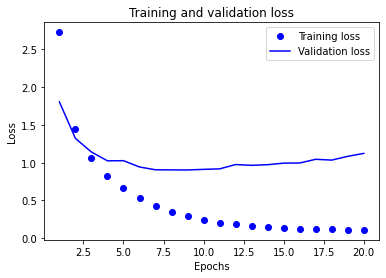

In [130]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

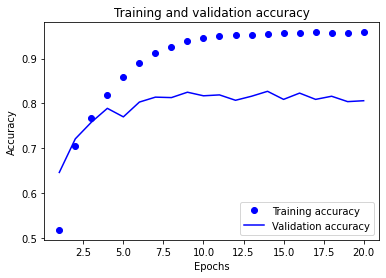

In [131]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 5

Write code to try different combinations of:
- numbers of hidden layers and units per layer 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

I implemented three classes to achieve this todo below

build model
compile model
train data
train model
Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 2.6523 - accuracy: 0.2975 - val_loss: 2.1994 - val_accuracy: 0.3630
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 2.0045 - accuracy: 0.4622 - val_loss: 1.8131 - val_accuracy: 0.5540
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5909 - accuracy: 0.6280 - val_loss: 1.5099 - val_accuracy: 0.6410
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3286 - accuracy: 0.6969 - val_loss: 1.3858 - val_accuracy: 0.6950
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1505 - accuracy: 0.7326 - val_loss: 1.2678 - val_accuracy: 0.7140
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9876 - accuracy: 0.7660 - val_loss: 1.2294 - val_accuracy: 0.7290
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8614 - accuracy: 0.7937 - val_

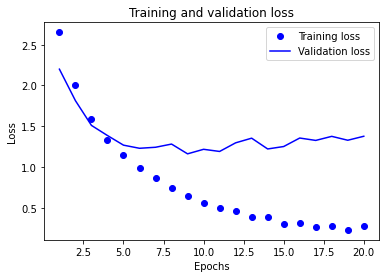

Plotting the training and validation loss


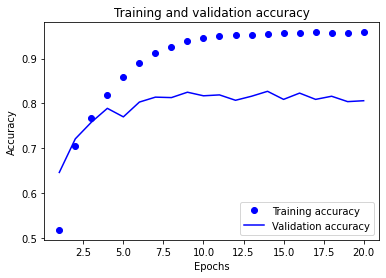

In [138]:
class Todo5_A:

    # init method or constructor   
    def __init__(self,x,y ):
        self.x_train = x
        self.y_train = y
        self.build()

    def build(self):
        self.build_model()
        self.compile_model()
        self.train_data()
        self.train_Model()
        self.plot_A()
        self.plot_B()

    def build_model(self):
        print("build model")
        self.model = keras.Sequential([
            layers.Dense(48, activation="softplus"),
            layers.Dense(48, activation="softplus"),
            layers.Dense(64, activation="softplus"),
            layers.Dense(64, activation="softplus"),
            layers.Dense(46, activation="softmax")
        ])

    def compile_model(self):
        print("compile model")
        self.model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

    def train_data(self):
        print("train data")
        self.x_val_optional = self.x_train[:1000]
        self.partial_x_train_optional = self.x_train[1000:]
        self.y_val_optional = self.y_train[:1000]
        self.partial_y_train_optional = self.y_train[1000:]
        
    def train_Model(self):
        print("train model")
        self.history_optional = self.model.fit(self.partial_x_train_optional,
                                     self.partial_y_train_optional,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(self.x_val_optional, self.y_val_optional))
    def plot_A(self):
        print("Plotting the training and validation loss")
        self.loss = self.history_optional.history["loss"]
        self.val_loss =self.history_optional.history["val_loss"]
        self.epochs = range(1, len(self.loss) + 1)
        plt.plot(self.epochs, self.loss, "bo", label="Training loss")
        plt.plot(self.epochs, self.val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        
    def plot_B(self):
        print("Plotting the training and validation loss")
        plt.clf()
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, acc, "bo", label="Training accuracy")
        plt.plot(epochs, val_acc, "b", label="Validation accuracy")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
Todo5_A(x_train,y_train)

build model
compile model
train data
train model
Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 11.1713 - accuracy: 0.1128 - val_loss: 10.2257 - val_accuracy: 0.1450
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 11.4706 - accuracy: 0.1706 - val_loss: 10.9162 - val_accuracy: 0.1030
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 10.9816 - accuracy: 0.0990 - val_loss: 12.9462 - val_accuracy: 0.1140
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 12.6787 - accuracy: 0.1616 - val_loss: 12.2038 - val_accuracy: 0.1430
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 11.6376 - accuracy: 0.1211 - val_loss: 12.3299 - val_accuracy: 0.0710
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 10.6719 - accuracy: 0.0218 - val_loss: 11.1883 - val_accuracy: 0.0030
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 11.4438 - accuracy: 

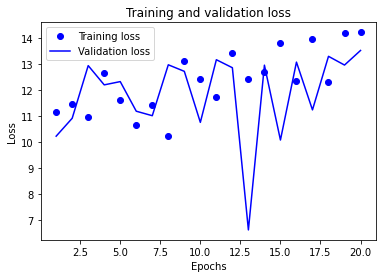

Plotting the training and validation loss


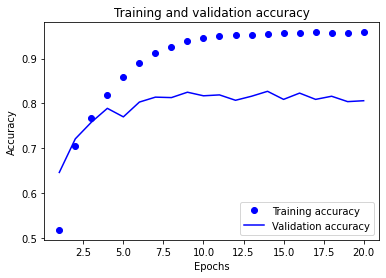

In [139]:
class Todo5_B:

    # init method or constructor   
    def __init__(self,x,y ):
        self.x_train = x
        self.y_train = y
        self.build()

    def build(self):
        self.build_model()
        self.compile_model()
        self.train_data()
        self.train_Model()
        self.plot_A()
        self.plot_B()

    def build_model(self):
        print("build model")
        self.model = keras.Sequential([
            layers.Dense(48, activation="softsign"),
            layers.Dense(48, activation="softsign"),
            layers.Dense(46, activation="tanh")
        ])

    def compile_model(self):
        print("compile model")
        self.model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

    def train_data(self):
        print("train data")
        self.x_val_optional = self.x_train[:1000]
        self.partial_x_train_optional = self.x_train[1000:]
        self.y_val_optional = self.y_train[:1000]
        self.partial_y_train_optional = self.y_train[1000:]
        
    def train_Model(self):
        print("train model")
        self.history_optional = self.model.fit(self.partial_x_train_optional,
                                     self.partial_y_train_optional,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(self.x_val_optional, self.y_val_optional))
    def plot_A(self):
        print("Plotting the training and validation loss")
        self.loss = self.history_optional.history["loss"]
        self.val_loss =self.history_optional.history["val_loss"]
        self.epochs = range(1, len(self.loss) + 1)
        plt.plot(self.epochs, self.loss, "bo", label="Training loss")
        plt.plot(self.epochs, self.val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        
    def plot_B(self):
        print("Plotting the training and validation loss")
        plt.clf()
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, acc, "bo", label="Training accuracy")
        plt.plot(epochs, val_acc, "b", label="Validation accuracy")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
Todo5_B(x_train,y_train)

build_model
compile model
train data
train model
Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.5394 - accuracy: 0.5298 - val_loss: 1.6929 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3980 - accuracy: 0.7050 - val_loss: 1.3091 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0581 - accuracy: 0.7752 - val_loss: 1.1550 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8408 - accuracy: 0.8256 - val_loss: 1.0657 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6749 - accuracy: 0.8581 - val_loss: 1.0127 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5435 - accuracy: 0.8881 - val_loss: 0.9766 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4386 - accuracy: 0.9089 - val_

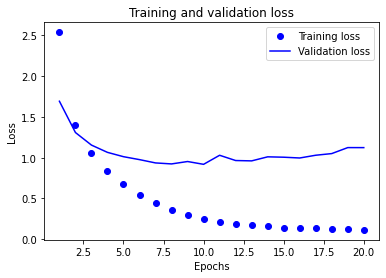

Plotting the training and validation loss


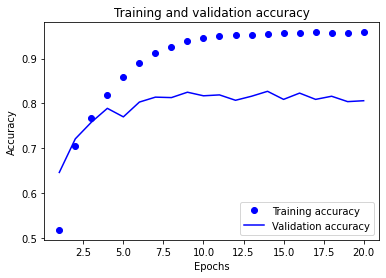

In [137]:
class Todo5_C:

    # init method or constructor   
    def __init__(self,x,y ):
        self.x_train = x
        self.y_train = y
        self.build()

    def build(self):
        self.build_model()
        self.compile_model()
        self.train_data()
        self.train_Model()
        self.plot_A()
        self.plot_B()

    def build_model(self):
        print("build model")
        self.model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
        ])

    def compile_model(self):
        print("compile model")
        self.model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

    def train_data(self):
        print("train data")
        self.x_val_optional = self.x_train[:1000]
        self.partial_x_train_optional = self.x_train[1000:]
        self.y_val_optional = self.y_train[:1000]
        self.partial_y_train_optional = self.y_train[1000:]
        
    def train_Model(self):
        print("train model")
        self.history_optional = self.model.fit(self.partial_x_train_optional,
                                     self.partial_y_train_optional,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(self.x_val_optional, self.y_val_optional))
    def plot_A(self):
        print("Plotting the training and validation loss")
        self.loss = self.history_optional.history["loss"]
        self.val_loss =self.history_optional.history["val_loss"]
        self.epochs = range(1, len(self.loss) + 1)
        plt.plot(self.epochs, self.loss, "bo", label="Training loss")
        plt.plot(self.epochs, self.val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        
    def plot_B(self):
        print("Plotting the training and validation loss")
        plt.clf()
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, acc, "bo", label="Training accuracy")
        plt.plot(epochs, val_acc, "b", label="Validation accuracy")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
Todo5_C(x_train,y_train)

### Retraining a model from scratch

In [36]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 12ms/step - loss: 2.6147 - accuracy: 0.5320
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.3787 - accuracy: 0.7177
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.0085 - accuracy: 0.7934
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.7885 - accuracy: 0.8383
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.6097 - accuracy: 0.8756
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4829 - accuracy: 0.8987
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3847 - accuracy: 0.9214
Epoch 8/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3158 - accuracy: 0.9338
Epoch 9/9
71/71 [==============================] - 0s 912us/step - loss: 0.9895 - accuracy: 0.7827


In [37]:
results

[0.9895129203796387, 0.7827248573303223]

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18121104185218165

### Generating predictions on new data

In [39]:
predictions = model.predict(x_test)

In [40]:
predictions[0].shape

(46,)

In [41]:
np.sum(predictions[0])

0.9999998

In [42]:
np.argmax(predictions[0])

3

(1) What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

(2) How many categories are there in this case?

(3) Does your model suffer from overfitting? If so, what would you suggest
doing about it?

(4) Is accuracy a good metric of success in this case? Why (not)?

1- The processing we used is called vectorization To vectorize the labels, there are two possibilities: we could just cast the label list as
an integer tensor, or we could use a "one-hot" encoding.
A. One-hot encoding is a widely used format for categorical data, also called "categorical encoding". 
For more information on on one-hot encoding,I found it in Chapter 6, Section 1 in the book referenced by professor.
B. In our case,one-hot encoding of our labels consists in embedding each label as an all-zero vector
with a 1 in the place of the label index, e.g.

2 - this topic classification problem looks  similar to our previous movie review
classification problem in problem number 1: in both cases, we are trying to classify short snippets of text.
In this use case case we have one more requirement though here: the number of output classes has gone from 2 to
46,. the dimensionality of the output is much larger. So we have a 46 output classes for categories.

3- It seems that the network starts overfitting after 9 epochs.

4 -Accuracy in this use case is a helpful metric.Again accuracy gives the values of correct predictions. When you view output above in resutls you can see accuracy hit  close to 80%.In the text book it shows examples for different use cases reach about 50% with random classifiers. When you look at the results after evaluate method above this shows we did pretty good compared to a random classifiers. 

## PART 3 - Regression for house price estimation using the Boston Housing Price dataset

### The Boston Housing Price dataset

#### Loading the Boston housing dataset

In [174]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [175]:
train_data.shape

(404, 13)

In [176]:
test_data.shape

(102, 13)

As you can see, we have 404 training samples and 102 test samples. The data
comprises 13 features. The 13 features in the input data are as follow:
1. Per capita crime rate.

2. Proportion of residential land zoned for lots over 25,000 square feet

3. Proportion of non-retail business acres per town.

4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

5. Nitric oxides concentration (parts per 10 million).

6. Average number of rooms per dwelling.

7. Proportion of owner-occupied units built prior to 1940.

8. Weighted distances to five Boston employment centres.

9. Index of accessibility to radial highways.

10. Full-value property-tax rate per $10,000.

11.  Pupil-teacher ratio by town.

12.  1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.

13.  % lower status of the population.


In [177]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [178]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

pg(79)Note that the quantities that we use for normalizing the test data have been computed
using the training data. We should never use in our workflow any quantity computed on
the test data, even for something as simple as data normalization

### Building your model

#### Model definition

In [179]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

In [180]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [181]:
all_scores

[1.8952926397323608, 2.196486473083496, 2.4960131645202637, 2.4728550910949707]

In [182]:
np.mean(all_scores)

2.265161842107773

#### Saving the validation logs at each fold

In [186]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [187]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

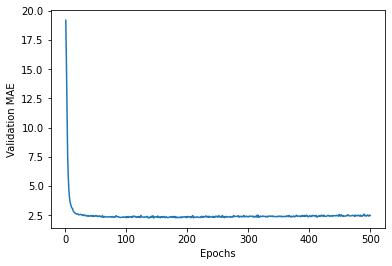

In [188]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [190]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 14.2533 - mae: 2.5295


In [191]:
test_mae_score

2.5294556617736816

### Generating predictions on new data

In [192]:
predictions = model.predict(test_data)
predictions[0]

array([8.386055], dtype=float32)

### (OPTIONAL) TODO 6

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

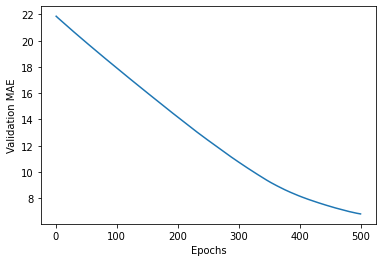

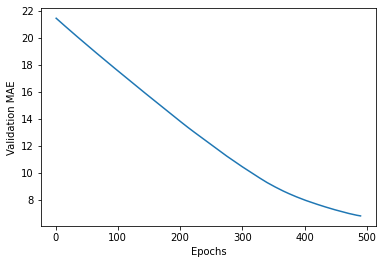

4/4 [==============================] - 0s 956us/step - loss: 342.8370 - mae: 16.1387
16.138689041137695


In [205]:
class Todo6_A:
    def __init__(self):
        self.build()

    def build(self):
        self.load_data()
        self.normalize_data()
        self.compile_model()
        self.validation_log_each_fold()
        self.plot_A()
        self.plot_B()
        self.train_final_model()

    def load_data(self):
        from tensorflow.keras.datasets import boston_housing
        (self.train_data, self.train_targets), (self.test_data, self.test_targets) = boston_housing.load_data()
        print(self.train_data.shape)
        print(self.test_data.shape)
        print(self.train_targets)

    def normalize_data(self):
        self.mean = self.train_data.mean(axis=0)
        self.train_data -= self.mean
        self.std = self.train_data.std(axis=0)
        self.train_data /= self.std
        self.test_data -= self.mean
        self.test_data /= self.std

    def build_model(self):
        self.model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dense(128, activation="softmax"),
            layers.Dense(128, activation="softmax"),
            layers.Dense(1)
        ])
        self.model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        return self.model

    def compile_model(self):
        self.k = 2
        self.num_val_samples = len(self.train_data) // k
        self.num_epochs = 50
        self.all_scores = []
        for i in range(k):
            print(f"Processing fold #{i}")
            val_data = self.train_data[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            val_targets = self.train_targets[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.partial_train_data = np.concatenate(
                [self.train_data[:i * self.num_val_samples],
                 self.train_data[(i + 1) * self.num_val_samples:]],
                axis=0)
            self.partial_train_targets = np.concatenate(
                [self.train_targets[:i * self.num_val_samples],
                 self.train_targets[(i + 1) * self.num_val_samples:]],
                axis=0)
            model = self.build_model()
            model.fit(self.partial_train_data, self.partial_train_targets,
                      epochs=self.num_epochs, batch_size=16, verbose=0)
            self.val_mse, self.val_mae = model.evaluate(val_data, val_targets, verbose=0)
            self.all_scores.append(self.val_mae)

    def validation_log_each_fold(self):
        print(self.all_scores)
        print(np.mean(self.all_scores))
        self.num_epochs = 500
        self.all_mae_histories = []
        for i in range(self.k):
            print(f"Processing fold #{i}")
            self.val_data = self.train_data[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.val_targets = self.train_targets[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.partial_train_data = np.concatenate(
                [self.train_data[:i * self.num_val_samples],
                 self.train_data[(i + 1) * self.num_val_samples:]],
                axis=0)
            self.partial_train_targets = np.concatenate(
                [self.train_targets[:i * self.num_val_samples],
                 self.train_targets[(i + 1) * self.num_val_samples:]],
                axis=0)
            model = self.build_model()
            history = model.fit(self.partial_train_data, self.partial_train_targets,
                                validation_data=(self.val_data, self.val_targets),
                                epochs=self.num_epochs, batch_size=16, verbose=0)
            self.mae_history = history.history["val_mae"]
            self.all_mae_histories.append(self.mae_history)
        self.average_mae_history = [
            np.mean([x[i] for x in self.all_mae_histories]) for i in range(self.num_epochs)]


    def plot_A(self):
        plt.plot(range(1, len(self.average_mae_history) + 1), self.average_mae_history)
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.show()
    def plot_B(self):
        self.truncated_mae_history = self.average_mae_history[10:]
        plt.plot(range(1, len(self.truncated_mae_history) + 1), self.truncated_mae_history)
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.show()

    def train_final_model(self):
        model = self.build_model()
        model.fit(self.train_data, self.train_targets,
                  epochs=130, batch_size=16, verbose=0)
        self.test_mse_score, self.test_mae_score = model.evaluate(self.test_data, self.test_targets)
        print(self.test_mae_score)
        predictions = model.predict(self.test_data)
        predictions[0]
Todo6_A()

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

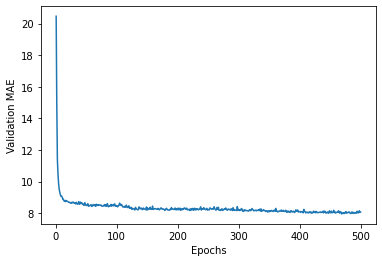

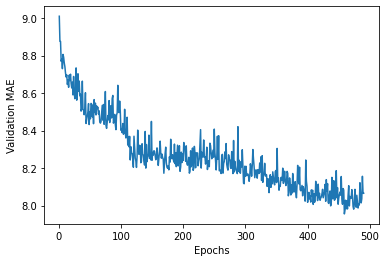

4/4 [==============================] - 0s 665us/step - loss: 162.3229 - mae: 7.6304
7.630380153656006


In [202]:
class Todo6_B:
    def __init__(self):
        self.build()

    def build(self):
        self.load_data()
        self.normalize_data()
        self.compile_model()
        self.validation_log_each_fold()
        self.plot_A()
        self.plot_B()
        self.train_final_model()

    def load_data(self):
        from tensorflow.keras.datasets import boston_housing
        (self.train_data, self.train_targets), (self.test_data, self.test_targets) = boston_housing.load_data()
        print(self.train_data.shape)
        print(self.test_data.shape)
        print(self.train_targets)

    def normalize_data(self):
        self.mean = self.train_data.mean(axis=0)
        self.train_data -= self.mean
        self.std = self.train_data.std(axis=0)
        self.train_data /= self.std
        self.test_data -= self.mean
        self.test_data /= self.std

    def build_model(self):
        self.model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1)
        ])
        self.model.add(Flatten())
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(128, activation='relu'))
        self.model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        return self.model

    def compile_model(self):
        self.k = 4
        self.num_val_samples = len(self.train_data) // k
        self.num_epochs = 100
        self.all_scores = []
        for i in range(k):
            print(f"Processing fold #{i}")
            val_data = self.train_data[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            val_targets = self.train_targets[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.partial_train_data = np.concatenate(
                [self.train_data[:i * self.num_val_samples],
                 self.train_data[(i + 1) * self.num_val_samples:]],
                axis=0)
            self.partial_train_targets = np.concatenate(
                [self.train_targets[:i * self.num_val_samples],
                 self.train_targets[(i + 1) * self.num_val_samples:]],
                axis=0)
            model = self.build_model()
            model.fit(self.partial_train_data, self.partial_train_targets,
                      epochs=self.num_epochs, batch_size=16, verbose=0)
            self.val_mse, self.val_mae = model.evaluate(val_data, val_targets, verbose=0)
            self.all_scores.append(self.val_mae)

    def validation_log_each_fold(self):
        print(self.all_scores)
        print(np.mean(self.all_scores))
        self.num_epochs = 500
        self.all_mae_histories = []
        for i in range(self.k):
            print(f"Processing fold #{i}")
            self.val_data = self.train_data[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.val_targets = self.train_targets[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.partial_train_data = np.concatenate(
                [self.train_data[:i * self.num_val_samples],
                 self.train_data[(i + 1) * self.num_val_samples:]],
                axis=0)
            self.partial_train_targets = np.concatenate(
                [self.train_targets[:i * self.num_val_samples],
                 self.train_targets[(i + 1) * self.num_val_samples:]],
                axis=0)
            model = self.build_model()
            history = model.fit(self.partial_train_data, self.partial_train_targets,
                                validation_data=(self.val_data, self.val_targets),
                                epochs=self.num_epochs, batch_size=16, verbose=0)
            self.mae_history = history.history["val_mae"]
            self.all_mae_histories.append(self.mae_history)
        self.average_mae_history = [
            np.mean([x[i] for x in self.all_mae_histories]) for i in range(self.num_epochs)]


    def plot_A(self):
        plt.plot(range(1, len(self.average_mae_history) + 1), self.average_mae_history)
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.show()
    def plot_B(self):
        self.truncated_mae_history = self.average_mae_history[10:]
        plt.plot(range(1, len(self.truncated_mae_history) + 1), self.truncated_mae_history)
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.show()

    def train_final_model(self):
        model = self.build_model()
        model.fit(self.train_data, self.train_targets,
                  epochs=130, batch_size=16, verbose=0)
        self.test_mse_score, self.test_mae_score = model.evaluate(self.test_data, self.test_targets)
        print(self.test_mae_score)
        predictions = model.predict(self.test_data)
        predictions[0]
Todo6_B()

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

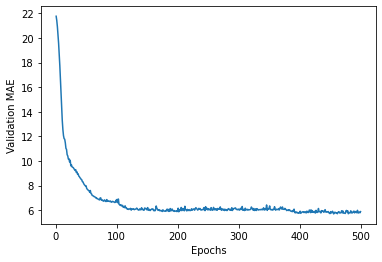

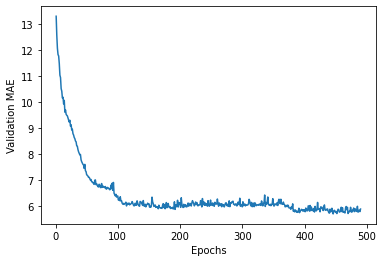

4/4 [==============================] - 0s 1ms/step - loss: 157.6763 - mae: 7.3534
7.353417873382568


In [204]:
class Todo6_C:
    def __init__(self):
        self.build()

    def build(self):
        self.load_data()
        self.normalize_data()
        self.compile_model()
        self.validation_log_each_fold()
        self.plot_A()
        self.plot_B()
        self.train_final_model()

    def load_data(self):
        from tensorflow.keras.datasets import boston_housing
        (self.train_data, self.train_targets), (self.test_data, self.test_targets) = boston_housing.load_data()
        print(self.train_data.shape)
        print(self.test_data.shape)
        print(self.train_targets)

    def normalize_data(self):
        self.mean = self.train_data.mean(axis=0)
        self.train_data -= self.mean
        self.std = self.train_data.std(axis=0)
        self.train_data /= self.std
        self.test_data -= self.mean
        self.test_data /= self.std

    def build_model(self):
        self.model = keras.Sequential([
            layers.Dense(128, activation="softmax"),
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),            
            layers.Dense(64, activation="softmax"),
            layers.Dense(1)
        ])
        self.model.add(Flatten())
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(128, activation='relu'))
        self.model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        return self.model

    def compile_model(self):
        self.k = 2
        self.num_val_samples = len(self.train_data) // k
        self.num_epochs = 100
        self.all_scores = []
        for i in range(k):
            print(f"Processing fold #{i}")
            val_data = self.train_data[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            val_targets = self.train_targets[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.partial_train_data = np.concatenate(
                [self.train_data[:i * self.num_val_samples],
                 self.train_data[(i + 1) * self.num_val_samples:]],
                axis=0)
            self.partial_train_targets = np.concatenate(
                [self.train_targets[:i * self.num_val_samples],
                 self.train_targets[(i + 1) * self.num_val_samples:]],
                axis=0)
            model = self.build_model()
            model.fit(self.partial_train_data, self.partial_train_targets,
                      epochs=self.num_epochs, batch_size=16, verbose=0)
            self.val_mse, self.val_mae = model.evaluate(val_data, val_targets, verbose=0)
            self.all_scores.append(self.val_mae)

    def validation_log_each_fold(self):
        print(self.all_scores)
        print(np.mean(self.all_scores))
        self.num_epochs = 500
        self.all_mae_histories = []
        for i in range(self.k):
            print(f"Processing fold #{i}")
            self.val_data = self.train_data[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.val_targets = self.train_targets[i * self.num_val_samples: (i + 1) * self.num_val_samples]
            self.partial_train_data = np.concatenate(
                [self.train_data[:i * self.num_val_samples],
                 self.train_data[(i + 1) * self.num_val_samples:]],
                axis=0)
            self.partial_train_targets = np.concatenate(
                [self.train_targets[:i * self.num_val_samples],
                 self.train_targets[(i + 1) * self.num_val_samples:]],
                axis=0)
            model = self.build_model()
            history = model.fit(self.partial_train_data, self.partial_train_targets,
                                validation_data=(self.val_data, self.val_targets),
                                epochs=self.num_epochs, batch_size=16, verbose=0)
            self.mae_history = history.history["val_mae"]
            self.all_mae_histories.append(self.mae_history)
        self.average_mae_history = [
            np.mean([x[i] for x in self.all_mae_histories]) for i in range(self.num_epochs)]


    def plot_A(self):
        plt.plot(range(1, len(self.average_mae_history) + 1), self.average_mae_history)
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.show()
    def plot_B(self):
        self.truncated_mae_history = self.average_mae_history[10:]
        plt.plot(range(1, len(self.truncated_mae_history) + 1), self.truncated_mae_history)
        plt.xlabel("Epochs")
        plt.ylabel("Validation MAE")
        plt.show()

    def train_final_model(self):
        model = self.build_model()
        model.fit(self.train_data, self.train_targets,
                  epochs=130, batch_size=16, verbose=0)
        self.test_mse_score, self.test_mae_score = model.evaluate(self.test_data, self.test_targets)
        print(self.test_mae_score)
        predictions = model.predict(self.test_data)
        predictions[0]
Todo6_C()

(1)What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

(2)Why is this problem a case of regression(rather than classification)?

(3)Does your model suffer from overfitting?If so, what would you suggest doing about it?

(4)Is mean absolute error(MAE)a good metric of success in this case? Why (not)?

1-pg(79) It would be a a major problem to send our nueral network, values that all take different ranges.
The network might be able to automatically adapt to such heterogeneous data, but
it would definitely make learning more difficult(According to the author). 

A standard best practice pre processing method to deal with this use case and data is to do feature-wise normalization.Which is for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.

2 - This is a regression problem. The reason it is a regression problem is because its a use case where we are trying to predict a single continuous value. Also this example displays a scalar regression model setup.

3 - When you look at plot you can see  that the validation mae stop imporve after 80 epoch. We see overfitting after that.

4- It is a good metric of success for this use case. Metrics used to interprest results from a regression problem are different than metrics used to interpret results from a classification problem. The value of "accuracy" does not apply for regression use cases. A standard metric to use for regression use cases is Mean Absolute Error (MAE).

pg(81) We are compiling the network with the loss function—Mean Squared mse Error, the square of the different between the predictions and the targets. This is also considered a standard and a widely used loss function for regression problems It is simply the absolute value of the difference between the predictions and the targets. 

### CONCLUSIONS

Use this area to write your conclusions, lessons learned, etc.

In conclusion the three examples  binary classification example, multi-class classification example, and the regression example were super helpful for me to have better understand ing on how to handle these use cases with nueral networks. I was ablee to implement and manipulates different algorithms and actually learn hands on skills. I was able to get better understanding of the results to useful use cases and able to translate and manipulate outputs. I really enjoyed this.